**Artificial Intelligence - Assignment 2**

Importing Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Download the Dataset**

**2. Load the Dataset**

In [7]:
dataset=pd.read_csv("/content/Churn_Modelling.csv") #2
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
'''
Dropping unnecessary columns
'''

dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)
print(dataset.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


**3. Univariate Analysis**

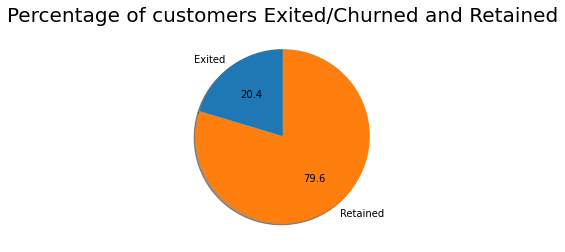

'\nIt is infered that only 20.4% of the people have churned and the rest have not\n'

In [9]:
labels = 'Exited', 'Retained'
sizes = [dataset.Exited[dataset['Exited']==1].count(), dataset.Exited[dataset['Exited']==0].count()]
plt.pie(sizes,labels=labels,autopct='%1.1f',shadow=True,startangle=90)
plt.title("Percentage of customers Exited/Churned and Retained",size =20)
plt.show()
'''
It is infered that only 20.4% of the people have churned and the rest have not
'''

'\nFrom this graph we come into conclusion that there are less people from Spain who have exited \nand majority of people were from France \n'

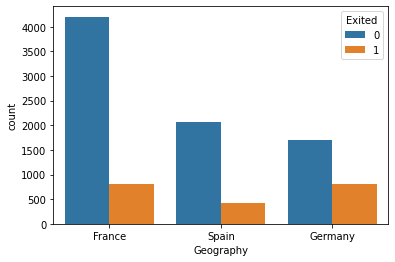

In [10]:

sns.countplot(x='Geography', hue='Exited',data=dataset)
'''
From this graph we come into conclusion that there are less people from Spain who have exited 
and majority of people were from France 
'''

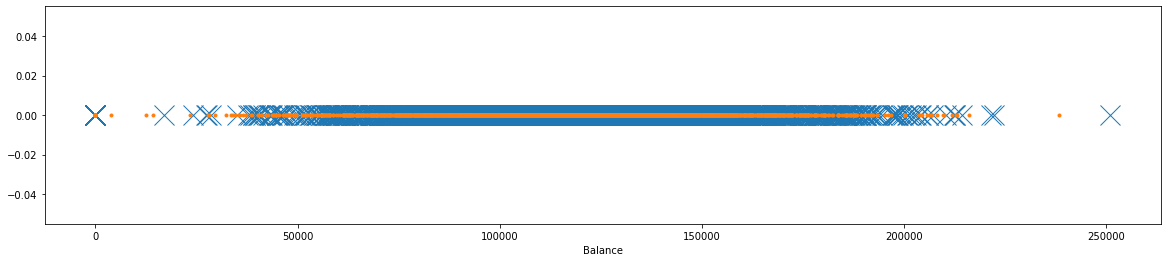

'\nIt is infered from the below graph that the Balance for Men is more than the Women i.e., there are more number of Men having Balance greater than 200000\n'

In [11]:
df_Male = dataset.loc[dataset['Gender']=='Male'] 
df_Female = dataset.loc[dataset['Gender']=='Female']

f = plt.figure()
f.set_figwidth(20)

plt.plot(df_Male['Balance'],np.zeros_like(df_Male['Balance']),'x',markersize=20) #Blue - Male
plt.plot(df_Female['Balance'],np.zeros_like(df_Female['Balance']),'.') #Orange - Female
plt.xlabel('Balance')
plt.show()

'''
It is infered from the below graph that the Balance for Men is more than the Women i.e., there are more number of Men having Balance greater than 200000
'''

**3. Bivariate Analysis**

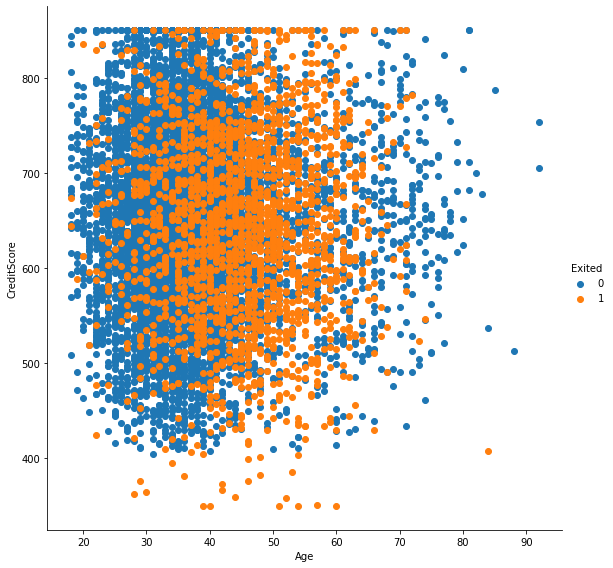

'\nIt is infered that the people who has CreditScore less than 400 have Churned and most of them are from the Age Group 30-60\n'

In [12]:
sns.FacetGrid(dataset,hue='Exited',height=8).map(plt.scatter,'Age','CreditScore').add_legend() 
plt.show()
'''
It is infered that the people who has CreditScore less than 400 have Churned and most of them are from the Age Group 30-60
'''

**3. Multivariate Analysis**

In [13]:
sns.pairplot(dataset,hue='Exited',height=10)

Output hidden; open in https://colab.research.google.com to view.

**4. Perform descriptive statistics on the dataset**

In [14]:
print(dataset.describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

**5. Handle the missing values**

In [15]:
print(dataset.isna().sum())
'''
There are no missing values or NaN
'''

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


'\nThere are no missing values or NaN\n'

**6. Find the outliers and replace the outliers**

In [16]:
def detect_outlier(data):
 outlier = []
 threshold = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i - mean)/std
 if np.abs(z_score)>threshold:
  outlier.append(i)
 return outlier
 
'''
It is found that there are no outliers in the dataset
'''

'\nIt is found that there are no outliers in the dataset\n'

In [17]:
CreditScore_list = dataset['CreditScore'].tolist()#6
CreditScore_outlier = detect_outlier(CreditScore_list)
CreditScore_outlier

[]

In [18]:
Balance_list = dataset['Balance'].tolist()#6
Balance_outlier = detect_outlier(Balance_list)
Balance_outlier

[]

In [19]:
EstimatedSalary_list = dataset['EstimatedSalary'].tolist()#6
EstimatedSalary_outlier = detect_outlier(EstimatedSalary_list)
EstimatedSalary_outlier

[]

**7. Check for categorical columns and perform encoding**

In [22]:

#One Hot Encoding
df1=pd.get_dummies(dataset['Geography']) 
df2=pd.get_dummies(dataset['Gender'],drop_first=True)
new_dataset=pd.concat([df1,df2,dataset],axis=1)
new_dataset.drop('Geography',axis=1,inplace=True)
new_dataset.drop('Gender',axis=1,inplace=True)
print(new_dataset.head())
'''
Removed Female column for Gender since Male column alone would be sufficient enough to differentiate Gender
'''

   France  Germany  Spain  Male  CreditScore  Age  Tenure    Balance  \
0       1        0      0     0          619   42       2       0.00   
1       0        0      1     0          608   41       1   83807.86   
2       1        0      0     0          502   42       8  159660.80   
3       1        0      0     0          699   39       1       0.00   
4       0        0      1     0          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0  


'\nRemoved Female column for Gender since Male column alone would be sufficient enough to differentiate Gender\n'

**8. Split the data into dependent and independent variables**

In [23]:
#x(independent variables) and y(dependent variables)
x=dataset.iloc[:,0:10]
y=dataset.iloc[:,10]
print(x) #Printing independent variables

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

**9. Scale the independent variables**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=new_dataset.drop(['Exited'],axis=1)
scaler.fit_transform(data)

array([[ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00280393, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99720391, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

**10. Split the data into training and testing**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)
